In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score

In [5]:
data = pd.read_csv("Mall_Customers.csv")

In [6]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Genre'])

In [9]:
X = data[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

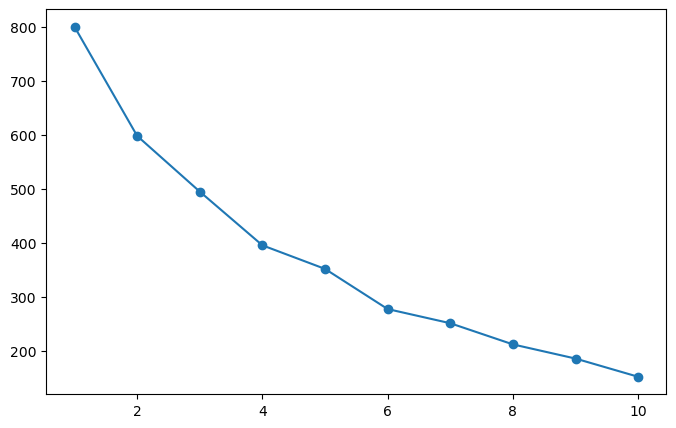

In [12]:
plt.figure(figsize = (8,5))
plt.plot(range(1,11),wcss,marker = 'o')

In [15]:
k = 4
kmeans = KMeans(n_clusters = k,random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

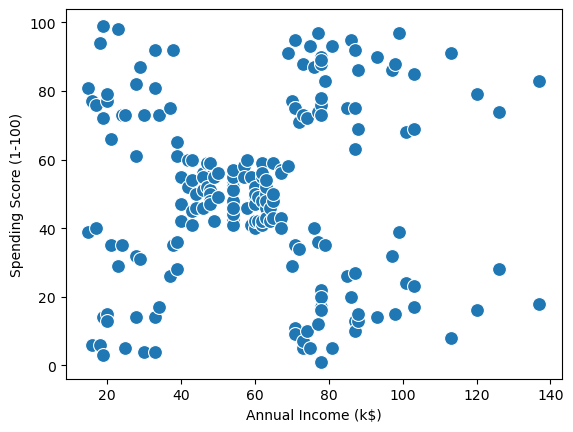

In [20]:
sns.scatterplot(data = data,x = 'Annual Income (k$)',y='Spending Score (1-100)',s = 100)
plt.show()